<a href="https://colab.research.google.com/github/SinghTanmay024/CU-BEMS-smart-building-energy-forecasting/blob/main/2019B.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import pprint
from  sklearn.metrics import mean_squared_error
from tensorflow.keras.layers import Bidirectional
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Activation, Dense
import tensorflow as tf
from sklearn.preprocessing import MinMaxScaler

In [ ]:
dataset1 = pd.read_csv('2019Floor1.csv')
dataset2 = pd.read_csv('2019Floor2.csv')
dataset3 = pd.read_csv('2019Floor3.csv')
dataset4 = pd.read_csv('2019Floor4.csv')
dataset5 = pd.read_csv('2019Floor5.csv')
dataset7 = pd.read_csv('2019Floor7.csv')
print(dataset1.shape)
print(dataset2.shape)
print(dataset3.shape)
print(dataset4.shape)
print(dataset5.shape)
print(dataset7.shape)

In [ ]:
dataset1=dataset1.fillna(0)
dataset2=dataset2.fillna(0)
dataset3=dataset3.fillna(0)
dataset4=dataset4.fillna(0)
dataset5=dataset5.fillna(0)
dataset7=dataset7.fillna(0)

In [ ]:
dataset1 = dataset1.set_index('Date')
dataset2 = dataset2.set_index('Date')
dataset3 = dataset3.set_index('Date')
dataset4 = dataset4.set_index('Date')
dataset5 = dataset5.set_index('Date')
dataset7 = dataset7.set_index('Date')

In [ ]:
dataset1.index = pd.to_datetime(dataset1.index)
dataset2.index = pd.to_datetime(dataset2.index)
dataset3.index = pd.to_datetime(dataset3.index)
dataset4.index = pd.to_datetime(dataset4.index)
dataset5.index = pd.to_datetime(dataset5.index)
dataset7.index = pd.to_datetime(dataset7.index)

In [ ]:
dataset1 = dataset1[['F11','F12','F13','F14']]
dataset2 = dataset2[['F21','F22','F23','F24',]]
dataset3 = dataset3[['F31','F32','F33','F34','F35',]]
dataset4 = dataset4[['F41','F42','F43','F44','F45',]]
dataset5 = dataset5[['F51','F52','F53','F54','F55',]]
dataset7 = dataset7[['F71','F72','F73','F74','F75',]]

In [ ]:
dataset1['F15'] = dataset1['F11']+dataset1['F12']+dataset1['F13']+dataset1['F14']
dataset2['F25'] = dataset2['F21']+dataset2['F22']+dataset2['F23']+dataset2['F24']
dataset3['F36'] = dataset3['F31']+dataset3['F32']+dataset3['F33']+dataset3['F34']+dataset3['F35']
dataset4['F46'] = dataset4['F41']+dataset4['F42']+dataset4['F43']+dataset4['F44']+dataset4['F45']
dataset5['F56'] = dataset5['F51']+dataset5['F52']+dataset5['F53']+dataset5['F54']+dataset5['F55']
dataset7['F76'] = dataset7['F71']+dataset7['F72']+dataset7['F73']+dataset7['F74']+dataset7['F75']

In [ ]:
R1 = dataset1["F11"].to_list()
R2 = dataset1["F12"].to_list()
R3 = dataset1["F13"].to_list()
R4 = dataset1["F14"].to_list()

R5 = dataset2["F21"].to_list()
R6 = dataset2["F22"].to_list()
R7 = dataset2["F23"].to_list()
R8 = dataset2["F24"].to_list()

R9 = dataset3["F31"].to_list()
R10 = dataset3["F32"].to_list()
R11 = dataset3["F33"].to_list()
R12= dataset3["F34"].to_list()
R13= dataset3["F35"].to_list()

R14 = dataset4["F41"].to_list()
R15 = dataset4["F42"].to_list()
R16 = dataset4["F43"].to_list()
R17 = dataset4["F44"].to_list()
R18= dataset4["F45"].to_list()

R19 = dataset5["F51"].to_list()
R20 = dataset5["F52"].to_list()
R21 = dataset5["F53"].to_list()
R22 = dataset5["F54"].to_list()
R23= dataset5["F55"].to_list()

R24 = dataset7["F71"].to_list()
R25 = dataset7["F72"].to_list()
R26 = dataset7["F73"].to_list()
R27 = dataset7["F74"].to_list()
R28= dataset7["F75"].to_list()
D9 = dataset1.index.to_list()

In [ ]:
Df = pd.DataFrame(data={
    "R1":R1,
    "R2":R2,
    "R3":R3,
    "R4":R4,
    "R5":R5,
    "R6":R6,
    "R7":R7,
    "R8":R8,
    "R9":R9,
    "R10":R10,
    "R11":R11,
    "R12":R12,
    "R13":R13,
    "R14":R14,
    "R15":R15,
    "R16":R16,
    "R17":R17,
    "R18":R18,
    "R19":R19,
    "R20":R20,
    "R21":R21,
    "R22":R22,
    "R23":R23,
    "R24":R24,
    "R25":R25,
    "R26":R26,
    "R27":R27,
    "R28":R28,
    "D":D9,
})


In [ ]:
Df = Df.set_index('D')
Df = Df.resample('Y').sum()

In [ ]:
Df

In [ ]:
Df.plot(kind="bar",figsize=(15, 8))

In [ ]:
p = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28]
room = [9,1,2,3,6,5,4,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,7,26,8,28]
DF = pd.DataFrame(data={
    "P":p,
    "Room":room,
})
DF = DF.set_index('P')

In [ ]:
DF

In [ ]:
F1 = dataset1["F15"].to_list()
F2 = dataset2["F25"].to_list()
F3 = dataset3["F36"].to_list()
F4 = dataset4["F46"].to_list()
F5 = dataset5["F56"].to_list()
F7 = dataset7["F76"].to_list()
D9 = dataset1.index.to_list()


Df = pd.DataFrame(data={
    "F1":F1,
    "F2":F2,
    "F3":F3,
    "F4":F4,
    "F5":F5,
    "F7":F7,
    "D":D9,

})
print(Df)

In [ ]:
Df = Df.set_index('D')
Df.index = pd.to_datetime(Df.index)

In [ ]:
Df['F'] = Df['F1']+Df['F2']+Df['F3']+Df['F4']+Df['F5']+Df['F7']
print(Df)

In [ ]:
NewDataSetH = Df.resample('60T').sum()

In [ ]:
df = pd.DataFrame(NewDataSetH)
  
# saving the dataframe
df.to_csv('file1.csv')

In [ ]:
maxValues = df[['F1']].max()

In [ ]:
maxValues

In [ ]:
print(df[df.F1 == df.F1.max()])

In [ ]:
NewDataSetH

In [ ]:
X = NewDataSetH.iloc[:,[1,2]].values

In [ ]:
X

In [ ]:
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [ ]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters = 4, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(X)

In [ ]:
y_kmeans

In [ ]:
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(X[y_kmeans == 3, 0], X[y_kmeans == 3, 1], s = 100, c = 'cyan', label = 'Cluster 4')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'yellow', label = 'Centroids')
plt.title('Clusters of customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()

In [ ]:
NewDataSetH = NewDataSetH['F']
print(NewDataSetH.shape)

(8760,)


In [ ]:
NewDataSetH = NewDataSetH.values

In [ ]:
!pip install wget
!pip install keras-tcn
import wget
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from tensorflow.keras import Input, Model
from tensorflow.keras.layers import Dense
from tqdm.notebook import tqdm

from tcn import TCN

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Created wheel for wget: filename=wget-3.2-py3-none-any.whl size=9675 sha256=206d3888e53ec60fba6cb97896b58fe53009b894280ee18657837372681a93fe
  Stored in directory: /root/.cache/pip/wheels/a1/b6/7c/0e63e34eb06634181c63adacca38b79ff8f35c37e3c13e3c02
Successfully built wget
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.1 MB 25.1 MB/s 


In [ ]:
lookback_window = 3

In [ ]:
x = []
y = []
for i in tqdm(range(lookback_window, len(NewDataSetH))):
    x.append(NewDataSetH[i - lookback_window:i])
    y.append(NewDataSetH[i])

  0%|          | 0/8757 [00:00<?, ?it/s]

In [ ]:
x = np.array(x)
y = np.array(y)
print(x.shape)
print(y.shape)

(8757, 3)
(8757,)


In [ ]:
i = Input(shape=(lookback_window, 1))
m = TCN()(i)
m = Dense(1, activation='linear')(m)

model = Model(inputs=[i], outputs=[m])
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 3, 1)]            0         
                                                                 
 tcn (TCN)                   (None, 64)                136256    
                                                                 
 dense (Dense)               (None, 1)                 65        
                                                                 
Total params: 136,321
Trainable params: 136,321
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.compile('adam','mae')

In [ ]:
print('Train...')
model.fit(x, y, epochs=1)

Train...
274/274 [==============================] - 17s 8ms/step - loss: 5336.5220


In [ ]:
predict = model.predict(x)

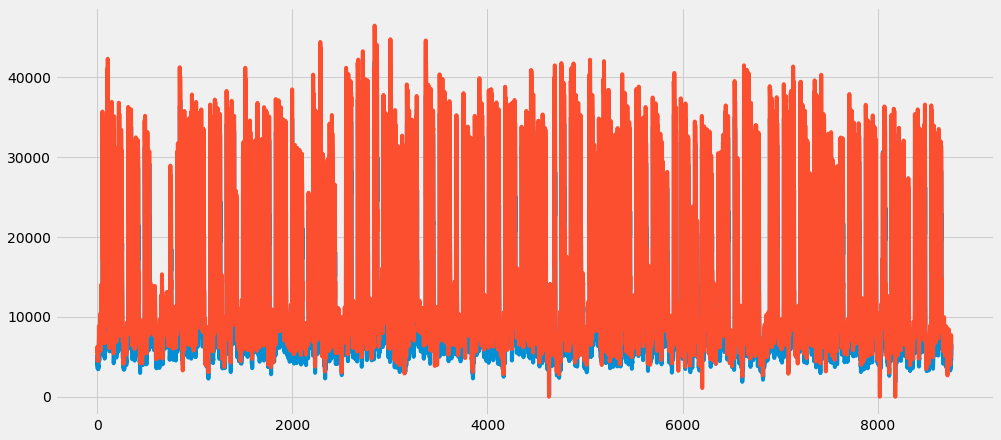

In [ ]:
plt.style.use("fivethirtyeight")
plt.figure(figsize = (15,7))
plt.plot(predict)
plt.plot(y)
plt.show()

In [ ]:
from sklearn.metrics import r2_score
print(r2_score(y, predict))

0.7300810729296915


In [ ]:
from  sklearn.metrics import mean_squared_error
mean_squared_error(y,predict)

26217415.585527293

In [ ]:
F1 = dataset1["F15"].to_list()
F2 = dataset2["F25"].to_list()
F3 = dataset3["F36"].to_list()
F4 = dataset4["F46"].to_list()
F5 = dataset5["F56"].to_list()
F7 = dataset7["F76"].to_list()
D9 = dataset1.index.to_list()


Df = pd.DataFrame(data={
    "F1":F1,
    "F2":F2,
    "F3":F3,
    "F4":F4,
    "F5":F5,
    "F7":F7,
    "D":D9,

})
Df = Df.set_index('D')
Df.index = pd.to_datetime(Df.index)
Df['F'] = Df['F1']+Df['F2']+Df['F3']+Df['F4']+Df['F5']+Df['F7']
NewDataSetH = Df.resample('60T').sum()

In [ ]:
X =NewDataSetH.iloc[:,[1,2,3,4,5]].values
y= NewDataSetH.iloc[:,-1].values
print(X.shape)
print(y.shape)

(8760, 5)
(8760,)


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.08493151, random_state = 0)
print(X_train.shape,X_test.shape,y_test.shape,y_train.shape)

(8015, 5) (745, 5) (745,) (8015,)


In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

5163645.258368464
0.9401276436446727


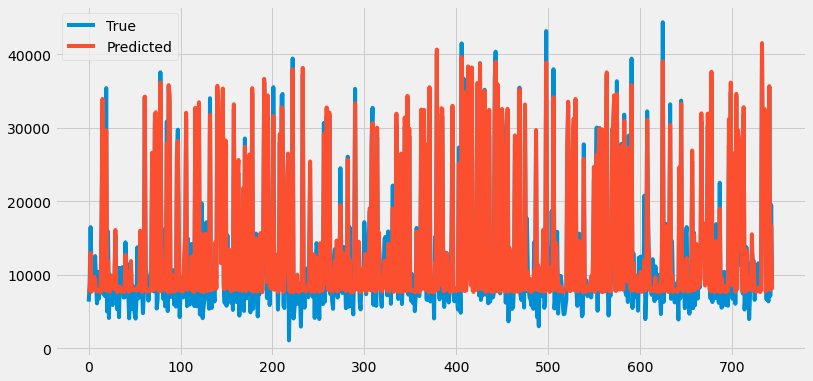

In [ ]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)
rlr=mean_squared_error(y_test,y_pred)
print(mean_squared_error(y_test,y_pred))
from sklearn.metrics import r2_score
print(r2_score(y_test, y_pred))
Machine_Df = pd.DataFrame(data={
    "True": y_test,
    "Predicted":y_pred,
})
Machine_Df.plot(figsize=(12,6))

3638762.1849771687
0.9578086302737072


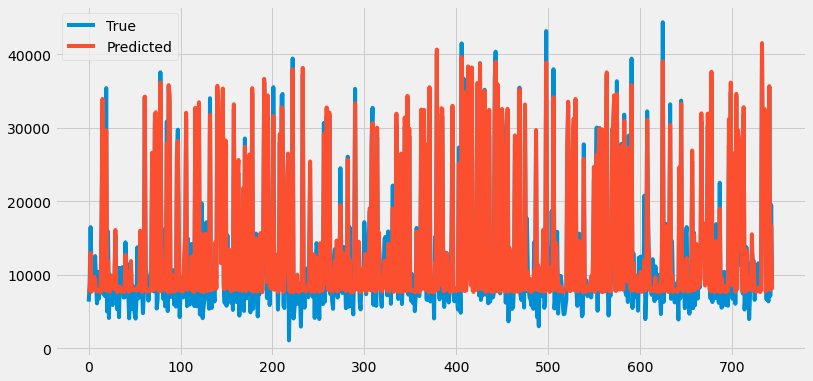

In [ ]:
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators = 10, random_state = 0)
regressor.fit(X_train, y_train)
X_pred = regressor.predict(X_test)
rrf=mean_squared_error(y_test,y_pred)
print(mean_squared_error(y_test,X_pred))
from sklearn.metrics import r2_score
print(r2_score(y_test, X_pred))
Machine_Df = pd.DataFrame(data={
    "True": y_test,
    "Predicted":y_pred,
})
Machine_Df.plot(figsize=(12,6))

75239604.03068374
0.127598400130575


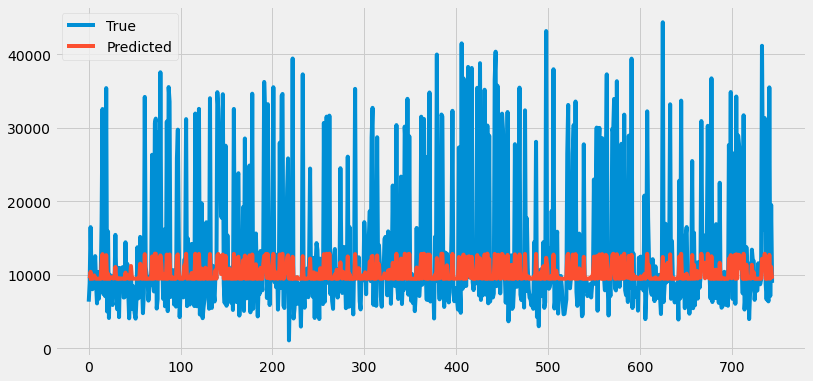

In [ ]:
from sklearn.svm import SVR
regressor = SVR(kernel = 'rbf')
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)
rsvr=mean_squared_error(y_test,y_pred)
print(mean_squared_error(y_test,y_pred))
from sklearn.metrics import r2_score
print(r2_score(y_test, y_pred))
Machine_Df = pd.DataFrame(data={
    "True": y_test,
    "Predicted":y_pred,
})
Machine_Df.plot(figsize=(12,6))

6541546.578179061
0.9241509073054606


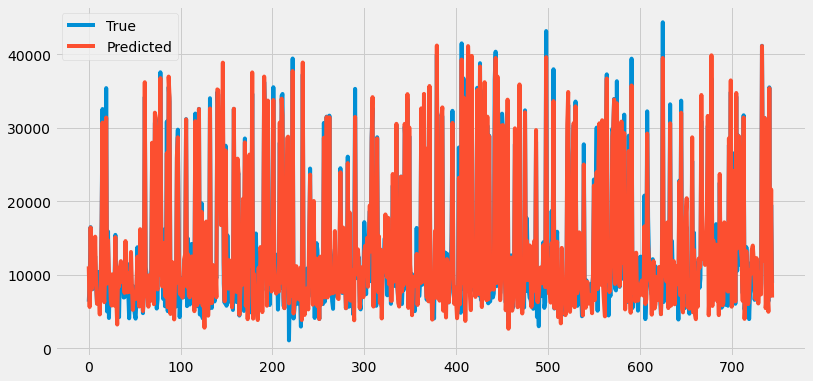

In [ ]:
from sklearn.tree import DecisionTreeRegressor
regressor = DecisionTreeRegressor(random_state = 0)
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)
rdt=mean_squared_error(y_test,y_pred)
print(mean_squared_error(y_test,y_pred))
from sklearn.metrics import r2_score
print(r2_score(y_test, y_pred))
Machine_Df = pd.DataFrame(data={
    "True": y_test,
    "Predicted":y_pred,
})
Machine_Df.plot(figsize=(12,6))

[09:03:02] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
3959032.795573946
0.9540950993922602


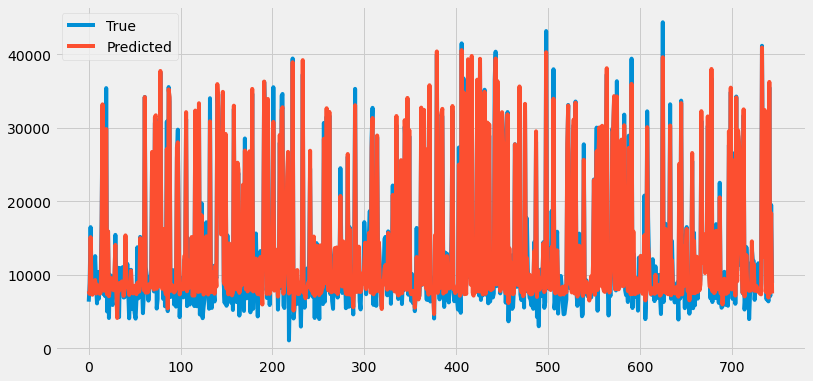

In [ ]:
from xgboost import XGBRegressor
Regressor = XGBRegressor()
Regressor.fit(X_train, y_train)
y_pred = Regressor.predict(X_test)
rxg=mean_squared_error(y_test,y_pred)
print(mean_squared_error(y_test,y_pred))
from sklearn.metrics import r2_score
print(r2_score(y_test, y_pred))
Machine_Df = pd.DataFrame(data={
    "True": y_test,
    "Predicted":y_pred,
})
Machine_Df.plot(figsize=(12,6))

Epoch 1/100
251/251 [==============================] - 1s 2ms/step - loss: 294842816.0000
Epoch 2/100
251/251 [==============================] - 1s 2ms/step - loss: 294833312.0000
Epoch 3/100
251/251 [==============================] - 1s 2ms/step - loss: 294826304.0000
Epoch 4/100
251/251 [==============================] - 1s 2ms/step - loss: 294819328.0000
Epoch 5/100
251/251 [==============================] - 1s 2ms/step - loss: 294812288.0000
Epoch 6/100
251/251 [==============================] - 1s 2ms/step - loss: 294805344.0000
Epoch 7/100
251/251 [==============================] - 1s 2ms/step - loss: 294798240.0000
Epoch 8/100
251/251 [==============================] - 1s 2ms/step - loss: 294791456.0000
Epoch 9/100
251/251 [==============================] - 1s 2ms/step - loss: 294784416.0000
Epoch 10/100
251/251 [==============================] - 1s 2ms/step - loss: 294777376.0000
Epoch 11/100
251/251 [==============================] - 1s 2ms/step - loss: 294770336.0000
Epoch 12

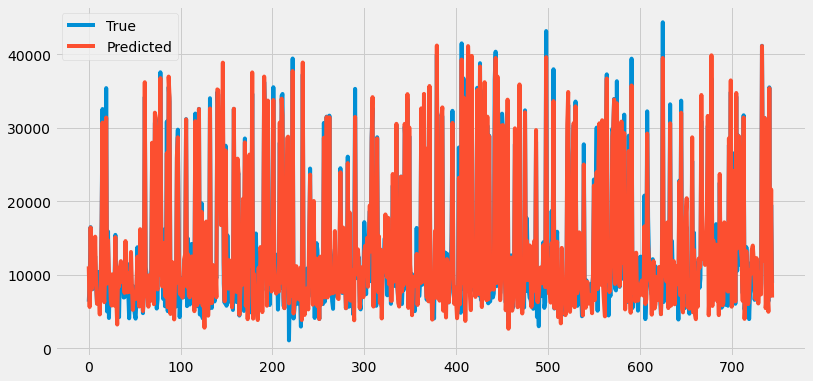

In [ ]:
ann = tf.keras.models.Sequential()
ann.add(tf.keras.layers.Dense(units=3, activation='relu'))
ann.add(tf.keras.layers.Dense(units=3, activation='relu'))
ann.add(tf.keras.layers.Dense(units=1))
ann.compile(optimizer = 'adam', loss = 'mean_squared_error')
ann.fit(X_train, y_train, batch_size = 32, epochs = 100)
y_pred = ann.predict(X_test)
np.set_printoptions(precision=2)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))
y_pred = regressor.predict(X_test)
print(mean_squared_error(y_test,y_pred))
from sklearn.metrics import r2_score
print(r2_score(y_test, y_pred))
rann=mean_squared_error(y_test,y_pred)
Machine_Df = pd.DataFrame(data={
    "True": y_test,
    "Predicted":y_pred,
})
Machine_Df.plot(figsize=(12,6))

# **Daily**

In [ ]:
NewDataSetH = Df.resample('D').sum()
NewDataSetH

,F1,F2,F3,F4,F5,F7,F
D,,,,,,,
2019-01-01,118114.71,17051.13,913.66,1544.91,963.56,621.73,139209.70
2019-01-02,151235.61,14842.29,8575.15,37241.50,10421.59,4823.95,227140.09
2019-01-03,170137.93,87158.05,43580.32,43086.81,45306.91,59989.31,449259.33
2019-01-04,143698.54,87126.30,16177.22,47931.93,54315.45,76693.92,425943.36
2019-01-05,193816.78,100372.92,54069.17,49537.34,54938.99,78886.09,531621.29
...,...,...,...,...,...,...,...
2019-12-27,145242.85,74334.63,43192.04,37976.48,40968.38,60804.53,402518.91
2019-12-28,167100.89,17990.07,859.20,681.10,1988.76,603.08,189223.10
2019-12-29,144160.52,19099.09,852.80,687.37,1960.22,928.96,167688.96


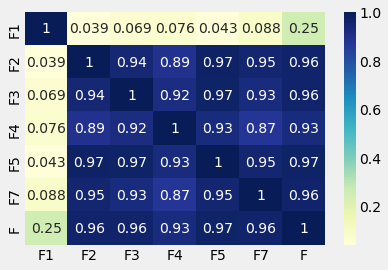

In [ ]:
sns.heatmap(NewDataSetH.corr(), cmap="YlGnBu", annot=True);

In [ ]:
X =NewDataSetH.iloc[:,[1,2,3,4,5]].values
y= NewDataSetH.iloc[:,-1].values
print(X.shape)
print(y.shape)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.08493151, random_state = 0)
print(X_train.shape,X_test.shape,y_test.shape,y_train.shape)
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

(365, 5)
(365,)
(333, 5) (32, 5) (32,) (333,)


352359479.6438164
0.9695076226064804


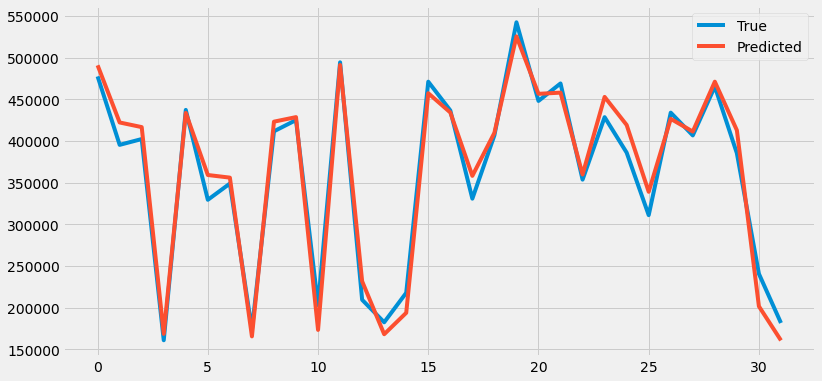

In [ ]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)
rlr=mean_squared_error(y_test,y_pred)
print(mean_squared_error(y_test,y_pred))
from sklearn.metrics import r2_score
print(r2_score(y_test, y_pred))
Machine_Df = pd.DataFrame(data={
    "True": y_test,
    "Predicted":y_pred,
})
Machine_Df.plot(figsize=(12,6))

453805999.8125824
0.960728674523766


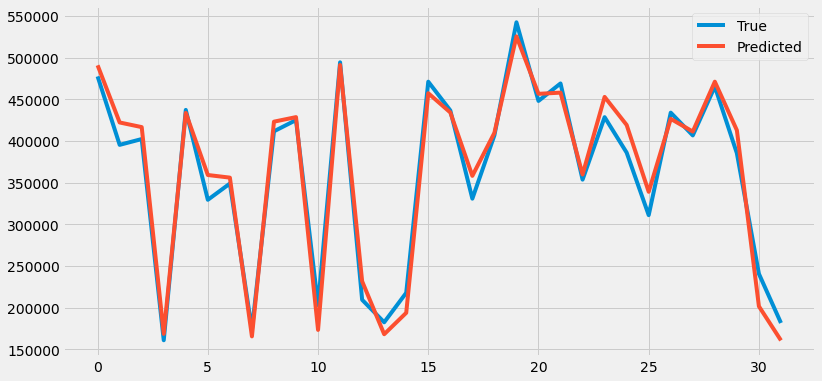

In [ ]:
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators = 10, random_state = 0)
regressor.fit(X_train, y_train)
X_pred = regressor.predict(X_test)
rrf=mean_squared_error(y_test,y_pred)
print(mean_squared_error(y_test,X_pred))
from sklearn.metrics import r2_score
print(r2_score(y_test, X_pred))
Machine_Df = pd.DataFrame(data={
    "True": y_test,
    "Predicted":y_pred,
})
Machine_Df.plot(figsize=(12,6))

12334529964.228868
-0.067401799495032


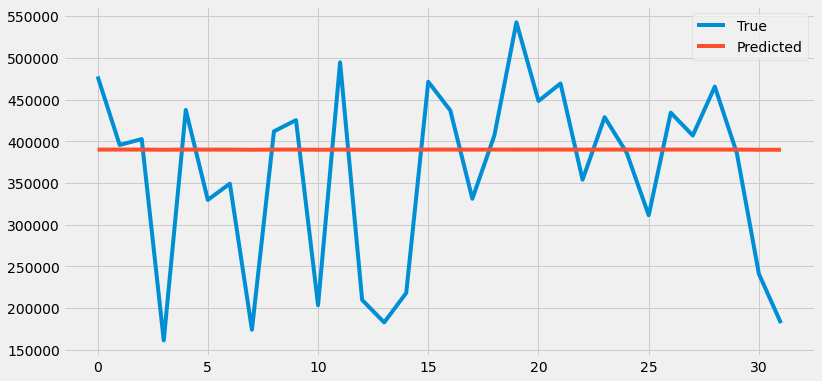

In [ ]:
from sklearn.svm import SVR
regressor = SVR(kernel = 'rbf')
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)
rsvr=mean_squared_error(y_test,y_pred)
print(mean_squared_error(y_test,y_pred))
from sklearn.metrics import r2_score
print(r2_score(y_test, y_pred))
Machine_Df = pd.DataFrame(data={
    "True": y_test,
    "Predicted":y_pred,
})
Machine_Df.plot(figsize=(12,6))

781971116.749028
0.9323300215256127


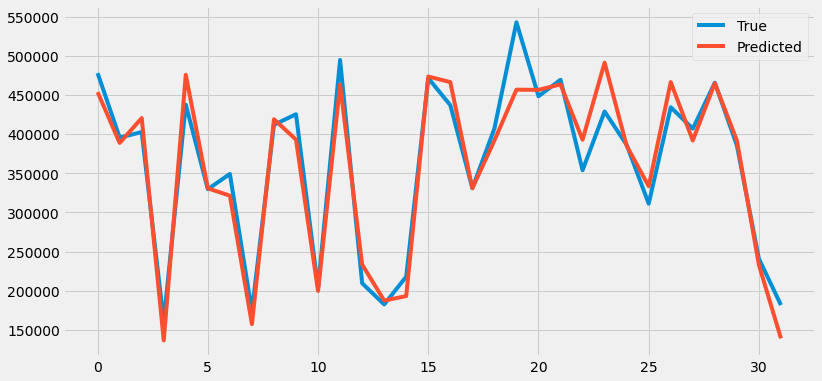

In [ ]:
from sklearn.tree import DecisionTreeRegressor
regressor = DecisionTreeRegressor(random_state = 0)
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)
rdt=mean_squared_error(y_test,y_pred)
print(mean_squared_error(y_test,y_pred))
from sklearn.metrics import r2_score
print(r2_score(y_test, y_pred))
Machine_Df = pd.DataFrame(data={
    "True": y_test,
    "Predicted":y_pred,
})
Machine_Df.plot(figsize=(12,6))

[09:04:04] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
505682984.5519097
0.9562393598094054


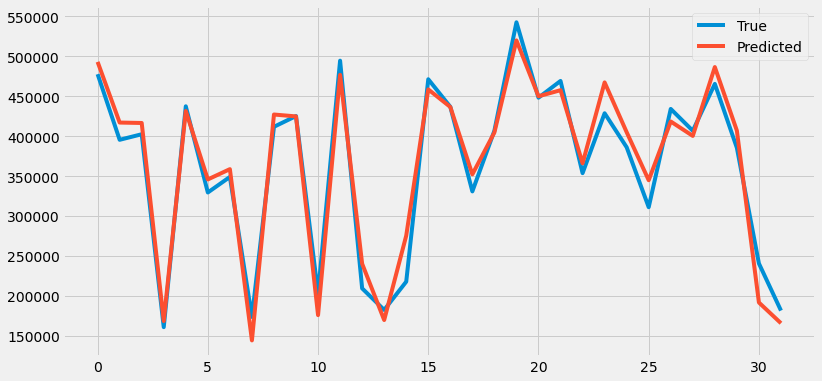

In [ ]:
from xgboost import XGBRegressor
Regressor = XGBRegressor()
Regressor.fit(X_train, y_train)
y_pred = Regressor.predict(X_test)
rxg=mean_squared_error(y_test,y_pred)
print(mean_squared_error(y_test,y_pred))
from sklearn.metrics import r2_score
print(r2_score(y_test, y_pred))
Machine_Df = pd.DataFrame(data={
    "True": y_test,
    "Predicted":y_pred,
})
Machine_Df.plot(figsize=(12,6))

Epoch 1/100
11/11 [==============================] - 0s 3ms/step - loss: 124652634112.0000
Epoch 2/100
11/11 [==============================] - 0s 3ms/step - loss: 124652535808.0000
Epoch 3/100
11/11 [==============================] - 0s 3ms/step - loss: 124652412928.0000
Epoch 4/100
11/11 [==============================] - 0s 2ms/step - loss: 124652281856.0000
Epoch 5/100
11/11 [==============================] - 0s 3ms/step - loss: 124652158976.0000
Epoch 6/100
11/11 [==============================] - 0s 3ms/step - loss: 124652036096.0000
Epoch 7/100
11/11 [==============================] - 0s 2ms/step - loss: 124651896832.0000
Epoch 8/100
11/11 [==============================] - 0s 3ms/step - loss: 124651741184.0000
Epoch 9/100
11/11 [==============================] - 0s 3ms/step - loss: 124651618304.0000
Epoch 10/100
11/11 [==============================] - 0s 3ms/step - loss: 124651454464.0000
Epoch 11/100
11/11 [==============================] - 0s 2ms/step - loss: 124651290624.00

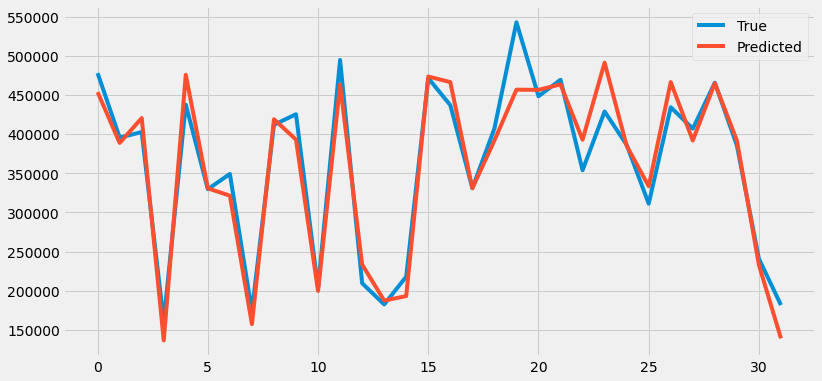

In [ ]:
ann = tf.keras.models.Sequential()
ann.add(tf.keras.layers.Dense(units=3, activation='relu'))
ann.add(tf.keras.layers.Dense(units=3, activation='relu'))
ann.add(tf.keras.layers.Dense(units=1))
ann.compile(optimizer = 'adam', loss = 'mean_squared_error')
ann.fit(X_train, y_train, batch_size = 32, epochs = 100)
y_pred = ann.predict(X_test)
np.set_printoptions(precision=2)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))
y_pred = regressor.predict(X_test)
print(mean_squared_error(y_test,y_pred))
from sklearn.metrics import r2_score
print(r2_score(y_test, y_pred))
rann=mean_squared_error(y_test,y_pred)
Machine_Df = pd.DataFrame(data={
    "True": y_test,
    "Predicted":y_pred,
})
Machine_Df.plot(figsize=(12,6))

<BarContainer object of 6 artists>

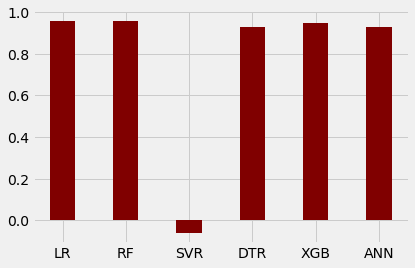

In [ ]:
r = ["LR","RF","SVR","DTR","XGB","ANN"]
T = [0.96,0.96,-0.06,0.93,0.95,0.93]
plt.bar(r, T, color ='maroon',
        width = 0.4)

# Week

In [ ]:
NewDataSetH = Df.resample('7D').sum()
NewDataSetH

,F1,F2,F3,F4,F5,F7,F
D,,,,,,,
2019-01-01,1087377.63,400327.30,174664.84,238110.76,216983.53,322191.68,2439655.74
2019-01-08,1029819.66,361867.62,184070.51,183057.32,184557.03,238502.27,2181874.41
2019-01-15,1057937.68,364419.83,221618.00,216352.88,212456.20,282815.36,2355599.95
2019-01-22,958025.08,222314.18,112820.97,222166.74,103982.17,110319.37,1729628.51
2019-01-29,1005928.96,241452.64,106077.00,211180.93,135473.70,141502.07,1841615.30
2019-02-05,1078759.99,440956.27,241582.04,234087.05,251028.34,332503.31,2578917.00
2019-02-12,983424.56,440289.39,227869.07,233968.36,226082.94,309496.73,2421131.05
2019-02-19,992638.22,403682.53,195351.53,201859.16,195368.54,251339.48,2240239.46
2019-02-26,1010314.54,423926.86,189623.19,212648.52,223666.66,303588.16,2363767.93


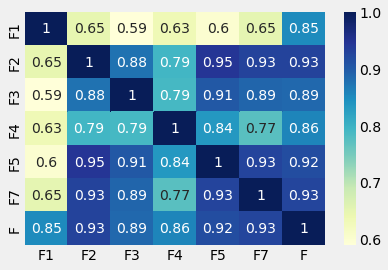

In [ ]:
sns.heatmap(NewDataSetH.corr(), cmap="YlGnBu", annot=True);

In [ ]:
X =NewDataSetH.iloc[:,[0,1,2,3,4,5]].values
y= NewDataSetH.iloc[:,-1].values
print(X.shape)
print(y.shape)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.08493151, random_state = 0)
print(X_train.shape,X_test.shape,y_test.shape,y_train.shape)
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

(53, 6)
(53,)
(48, 6) (5, 6) (5,) (48,)


2.168404344971009e-19
1.0


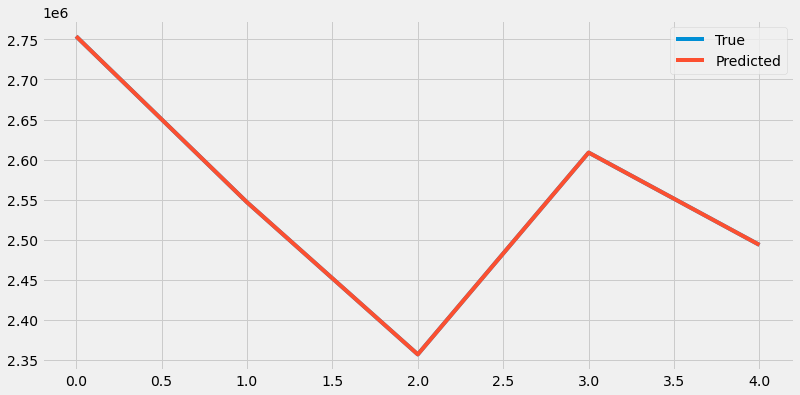

In [ ]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)
rlr=mean_squared_error(y_test,y_pred)
print(mean_squared_error(y_test,y_pred))
from sklearn.metrics import r2_score
print(r2_score(y_test, y_pred))
Machine_Df = pd.DataFrame(data={
    "True": y_test,
    "Predicted":y_pred,
})
Machine_Df.plot(figsize=(12,6))

4702590833.305988
0.7250325054262017


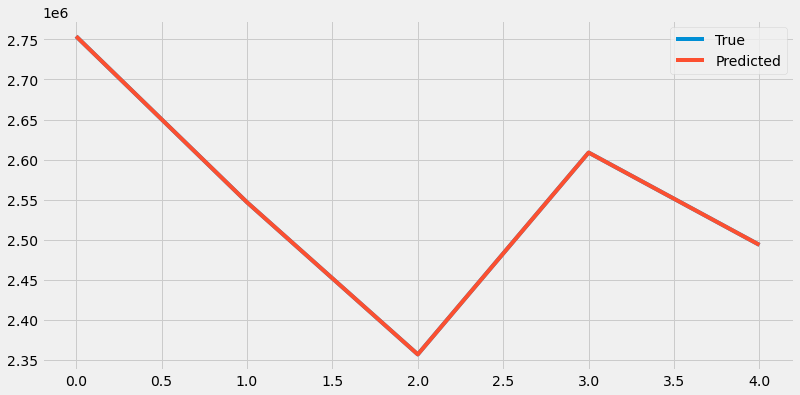

In [ ]:
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators = 10, random_state = 0)
regressor.fit(X_train, y_train)
X_pred = regressor.predict(X_test)
rrf=mean_squared_error(y_test,y_pred)
print(mean_squared_error(y_test,X_pred))
from sklearn.metrics import r2_score
print(r2_score(y_test, X_pred))
Machine_Df = pd.DataFrame(data={
    "True": y_test,
    "Predicted":y_pred,
})
Machine_Df.plot(figsize=(12,6))

56401962849.02285
-2.29790682697721


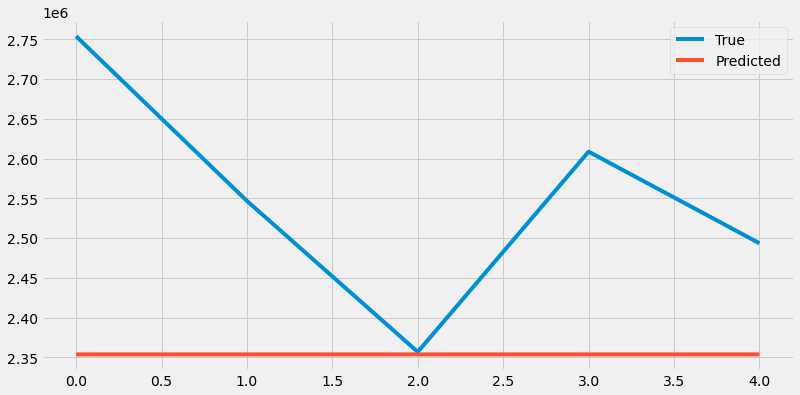

In [ ]:
from sklearn.svm import SVR
regressor = SVR(kernel = 'rbf')
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)
rsvr=mean_squared_error(y_test,y_pred)
print(mean_squared_error(y_test,y_pred))
from sklearn.metrics import r2_score
print(r2_score(y_test, y_pred))
Machine_Df = pd.DataFrame(data={
    "True": y_test,
    "Predicted":y_pred,
})
Machine_Df.plot(figsize=(12,6))

7802521925.873369
0.5437749144323805


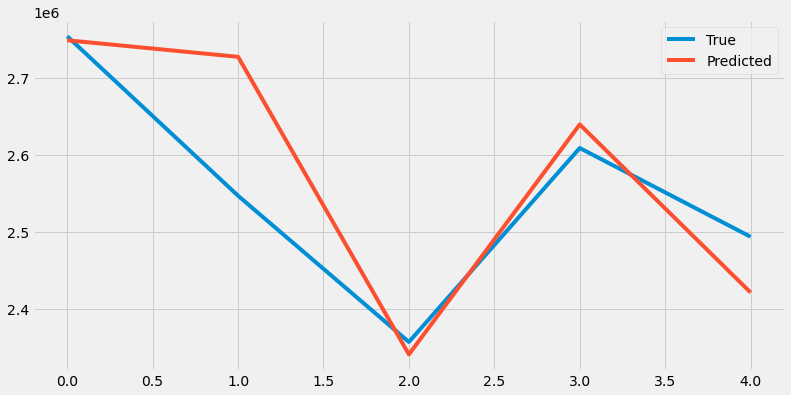

In [ ]:
from sklearn.tree import DecisionTreeRegressor
regressor = DecisionTreeRegressor(random_state = 0)
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)
rdt=mean_squared_error(y_test,y_pred)
print(mean_squared_error(y_test,y_pred))
from sklearn.metrics import r2_score
print(r2_score(y_test, y_pred))
Machine_Df = pd.DataFrame(data={
    "True": y_test,
    "Predicted":y_pred,
})
Machine_Df.plot(figsize=(12,6))

[09:04:11] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
5356492301.786554
0.6867979120159504


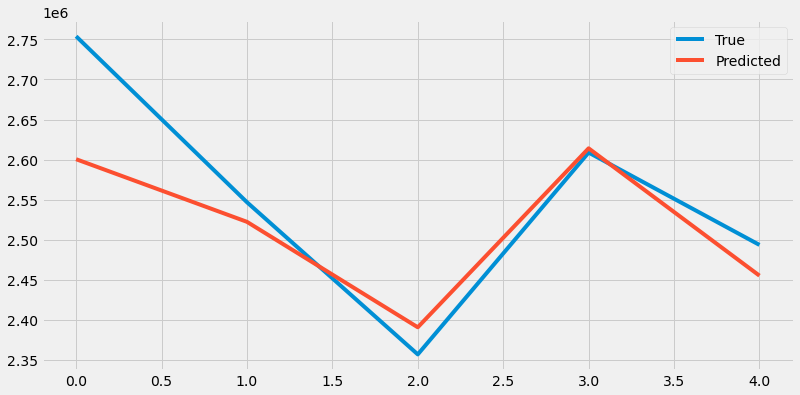

In [ ]:
from xgboost import XGBRegressor
Regressor = XGBRegressor()
Regressor.fit(X_train, y_train)
y_pred = Regressor.predict(X_test)
rxg=mean_squared_error(y_test,y_pred)
print(mean_squared_error(y_test,y_pred))
from sklearn.metrics import r2_score
print(r2_score(y_test, y_pred))
Machine_Df = pd.DataFrame(data={
    "True": y_test,
    "Predicted":y_pred,
})
Machine_Df.plot(figsize=(12,6))

Epoch 1/100
2/2 [==============================] - 0s 7ms/step - loss: 5367509024768.0000
Epoch 2/100
2/2 [==============================] - 0s 6ms/step - loss: 5367509024768.0000
Epoch 3/100
2/2 [==============================] - 0s 6ms/step - loss: 5367509024768.0000
Epoch 4/100
2/2 [==============================] - 0s 6ms/step - loss: 5367509024768.0000
Epoch 5/100
2/2 [==============================] - 0s 9ms/step - loss: 5367508500480.0000
Epoch 6/100
2/2 [==============================] - 0s 5ms/step - loss: 5367509024768.0000
Epoch 7/100
2/2 [==============================] - 0s 6ms/step - loss: 5367507976192.0000
Epoch 8/100
2/2 [==============================] - 0s 6ms/step - loss: 5367507976192.0000
Epoch 9/100
2/2 [==============================] - 0s 6ms/step - loss: 5367507976192.0000
Epoch 10/100
2/2 [==============================] - 0s 6ms/step - loss: 5367507976192.0000
Epoch 11/100
2/2 [==============================] - 0s 5ms/step - loss: 5367508500480.0000
Epoch 12

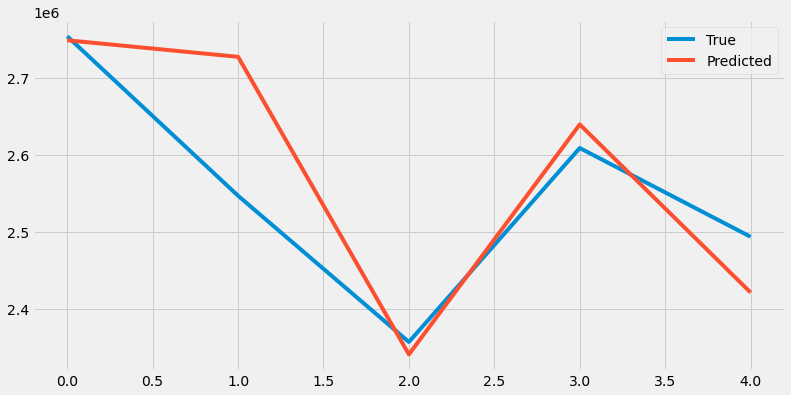

In [ ]:
ann = tf.keras.models.Sequential()
ann.add(tf.keras.layers.Dense(units=3, activation='relu'))
ann.add(tf.keras.layers.Dense(units=3, activation='relu'))
ann.add(tf.keras.layers.Dense(units=1))
ann.compile(optimizer = 'adam', loss = 'mean_squared_error')
ann.fit(X_train, y_train, batch_size = 32, epochs = 100)
y_pred = ann.predict(X_test)
np.set_printoptions(precision=2)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))
y_pred = regressor.predict(X_test)
print(mean_squared_error(y_test,y_pred))
from sklearn.metrics import r2_score
print(r2_score(y_test, y_pred))
rann=mean_squared_error(y_test,y_pred)
Machine_Df = pd.DataFrame(data={
    "True": y_test,
    "Predicted":y_pred,
})
Machine_Df.plot(figsize=(12,6))

<BarContainer object of 6 artists>

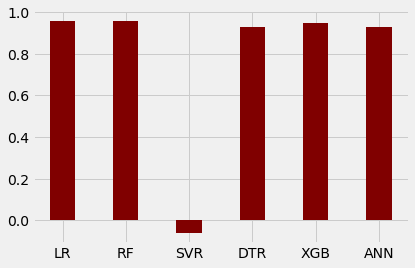

In [ ]:
r = ["LR","RF","SVR","DTR","XGB","ANN"]
T = [0.96,0.96,-0.06,0.93,0.95,0.93]
plt.bar(r, T, color ='maroon',
        width = 0.4)

In [ ]:
NewDataSetH = Df.resample('M').sum()
NewDataSetH

,F1,F2,F3,F4,F5,F7,F
D,,,,,,,
2019-01-31,4517836.47,1418183.65,736615.17,984371.73,754058.64,981074.72,9392140.38
2019-02-28,4093107.06,1712349.81,859684.43,887238.89,909054.12,1190758.32,9652192.63
2019-03-31,4567020.34,1852050.44,746006.83,884755.76,973574.76,1260931.84,10284339.97
2019-04-30,4560826.12,1787963.75,1029365.78,922249.58,1008240.93,1337923.87,10646570.03
2019-05-31,4960723.09,1977007.80,1055143.88,1023375.18,992089.97,1524968.61,11533308.53
2019-06-30,4701114.96,1694558.01,882894.07,861691.86,883396.66,1208128.24,10231783.80
2019-07-31,4595133.63,1669413.59,880283.88,915038.23,916787.94,1263112.69,10239769.96
2019-08-31,4761878.21,1844020.61,997291.87,1032303.29,989309.75,1407895.88,11032699.61
2019-09-30,4013925.88,1718721.64,923739.42,852040.05,904487.53,1187283.03,9600197.55


In [ ]:
X =NewDataSetH.iloc[:,[0,1,2,3,4,5]].values
y= NewDataSetH.iloc[:,-1].values
print(X.shape)
print(y.shape)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.8493151, random_state = 0)
print(X_train.shape,X_test.shape,y_test.shape,y_train.shape)
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

(12, 6)
(12,)
(1, 6) (11, 6) (11,) (1,)


449222173491.29254
-0.005140808007696007


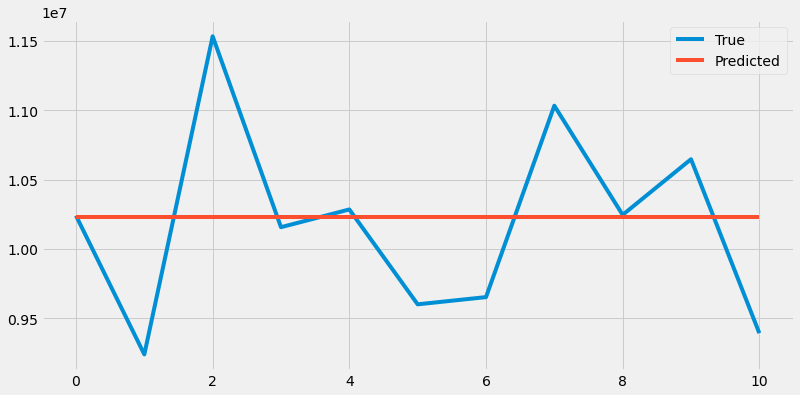

In [ ]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)
rlr=mean_squared_error(y_test,y_pred)
print(mean_squared_error(y_test,y_pred))
from sklearn.metrics import r2_score
print(r2_score(y_test, y_pred))
Machine_Df = pd.DataFrame(data={
    "True": y_test,
    "Predicted":y_pred,
})
Machine_Df.plot(figsize=(12,6))

449222173491.29224
-0.005140808007695341


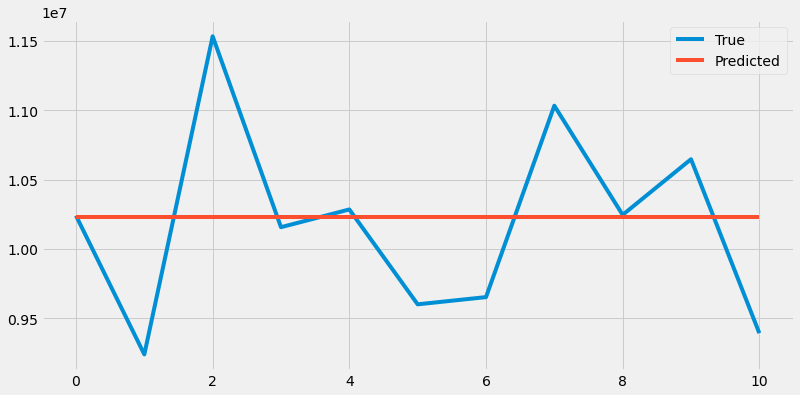

In [ ]:
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators = 10, random_state = 0)
regressor.fit(X_train, y_train)
X_pred = regressor.predict(X_test)
rrf=mean_squared_error(y_test,y_pred)
print(mean_squared_error(y_test,X_pred))
from sklearn.metrics import r2_score
print(r2_score(y_test, X_pred))
Machine_Df = pd.DataFrame(data={
    "True": y_test,
    "Predicted":y_pred,
})
Machine_Df.plot(figsize=(12,6))

449222173491.29254
-0.005140808007696007


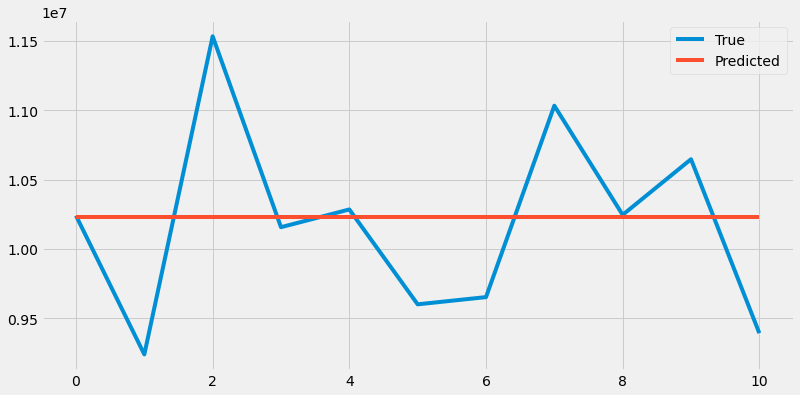

In [ ]:
from sklearn.svm import SVR
regressor = SVR(kernel = 'rbf')
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)
rsvr=mean_squared_error(y_test,y_pred)
print(mean_squared_error(y_test,y_pred))
from sklearn.metrics import r2_score
print(r2_score(y_test, y_pred))
Machine_Df = pd.DataFrame(data={
    "True": y_test,
    "Predicted":y_pred,
})
Machine_Df.plot(figsize=(12,6))

449222173491.29254
-0.005140808007696007


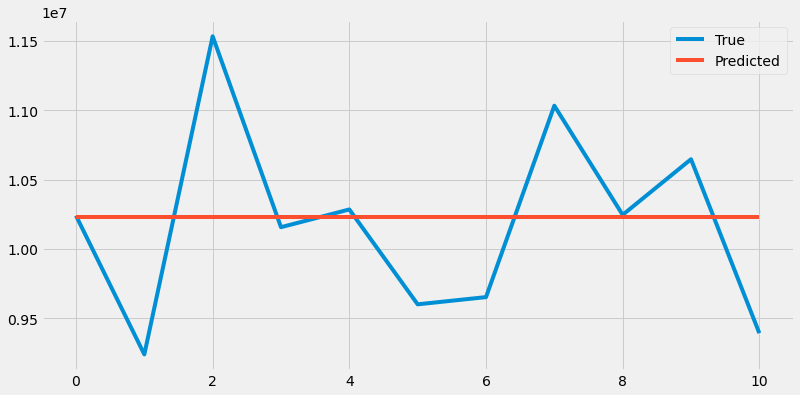

In [ ]:
from sklearn.tree import DecisionTreeRegressor
regressor = DecisionTreeRegressor(random_state = 0)
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)
rdt=mean_squared_error(y_test,y_pred)
print(mean_squared_error(y_test,y_pred))
from sklearn.metrics import r2_score
print(r2_score(y_test, y_pred))
Machine_Df = pd.DataFrame(data={
    "True": y_test,
    "Predicted":y_pred,
})
Machine_Df.plot(figsize=(12,6))

[09:04:14] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
447084515759.88654
-0.0003577693551506389


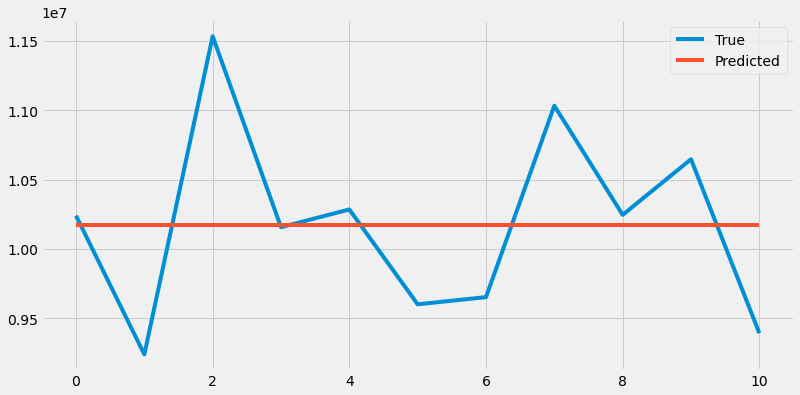

In [ ]:
from xgboost import XGBRegressor
Regressor = XGBRegressor()
Regressor.fit(X_train, y_train)
y_pred = Regressor.predict(X_test)
rxg=mean_squared_error(y_test,y_pred)
print(mean_squared_error(y_test,y_pred))
from sklearn.metrics import r2_score
print(r2_score(y_test, y_pred))
Machine_Df = pd.DataFrame(data={
    "True": y_test,
    "Predicted":y_pred,
})
Machine_Df.plot(figsize=(12,6))

# **LSTM** Rolling

In [ ]:
# Data wrangling
import pandas as pd
import numpy as np

# Deep learning: 
from keras.models import Sequential
from keras.layers import LSTM, Dense


class DeepModelTS():
    """
    A class to create a deep time series model
    """
    def __init__(
        self, 
        data: pd.DataFrame, 
        Y_var: str,
        lag: int,
        LSTM_layer_depth: int, 
        epochs=10, 
        batch_size=256,
        train_test_split=0
    ):

        self.data = data 
        self.Y_var = Y_var 
        self.lag = lag 
        self.LSTM_layer_depth = LSTM_layer_depth
        self.batch_size = batch_size
        self.epochs = epochs
        self.train_test_split = train_test_split

    @staticmethod
    def create_X_Y(ts: list, lag: int) -> tuple:
        """
        A method to create X and Y matrix from a time series list for the training of 
        deep learning models 
        """
        X, Y = [], []

        if len(ts) - lag <= 0:
            X.append(ts)
        else:
            for i in range(len(ts) - lag):
                Y.append(ts[i + lag])
                X.append(ts[i:(i + lag)])

        X, Y = np.array(X), np.array(Y)

        # Reshaping the X array to an LSTM input shape 
        X = np.reshape(X, (X.shape[0], X.shape[1], 1))

        return X, Y         

    def create_data_for_NN(
        self,
        use_last_n=None
        ):
        """
        A method to create data for the neural network model
        """
        # Extracting the main variable we want to model/forecast
        y = self.data[self.Y_var].tolist()

        # Subseting the time series if needed
        if use_last_n is not None:
            y = y[-use_last_n:]

        # The X matrix will hold the lags of Y 
        X, Y = self.create_X_Y(y, self.lag)

        # Creating training and test sets 
        X_train = X
        X_test = []

        Y_train = Y
        Y_test = []

        if self.train_test_split > 0:
            index = round(len(X) * self.train_test_split)
            X_train = X[:(len(X) - index)]
            X_test = X[-index:]     
            
            Y_train = Y[:(len(X) - index)]
            Y_test = Y[-index:]

        return X_train, X_test, Y_train, Y_test

    def LSTModel(self):
        """
        A method to fit the LSTM model 
        """
        # Getting the data 
        X_train, X_test, Y_train, Y_test = self.create_data_for_NN()

        # Defining the model
        model = Sequential()
        model.add(LSTM(self.LSTM_layer_depth, activation='relu', input_shape=(self.lag, 1)))
        model.add(Dense(1))
        model.compile(optimizer='adam', loss='mse')

        # Defining the model parameter dict 
        keras_dict = {
            'x': X_train,
            'y': Y_train,
            'batch_size': self.batch_size,
            'epochs': self.epochs,
            'shuffle': False
        }

        if self.train_test_split > 0:
            keras_dict.update({
                'validation_data': (X_test, Y_test)
            })

        # Fitting the model 
        model.fit(
            **keras_dict
        )

        # Saving the model to the class 
        self.model = model

        return model

    def predict(self) -> list:
        """
        A method to predict using the test data used in creating the class
        """
        yhat = []

        if(self.train_test_split > 0):
        
            # Getting the last n time series 
            _, X_test, _, _ = self.create_data_for_NN()        

            # Making the prediction list 
            yhat = [y[0] for y in self.model.predict(X_test)]

        return yhat

    def predict_n_ahead(self, n_ahead: int):
        """
        A method to predict n time steps ahead
        """    
        X, _, _, _ = self.create_data_for_NN(use_last_n=self.lag)        

        # Making the prediction list 
        yhat = []

        for _ in range(n_ahead):
            # Making the prediction
            fc = self.model.predict(X)
            yhat.append(fc)

            # Creating a new input matrix for forecasting
            X = np.append(X, fc)

            # Ommiting the first variable
            X = np.delete(X, 0)

            # Reshaping for the next iteration
            X = np.reshape(X, (1, len(X), 1))

        return yhat

In [ ]:
NewDataSetH = Df.resample('H').sum()
NewDataSetH

,F1,F2,F3,F4,F5,F7,F
D,,,,,,,
2019-01-01 00:00:00,5265.43,680.35,36.16,62.71,39.66,28.22,6112.53
2019-01-01 01:00:00,5317.02,721.72,37.29,61.20,35.16,25.76,6198.15
2019-01-01 02:00:00,4873.67,715.78,33.47,62.89,40.27,26.77,5752.85
2019-01-01 03:00:00,4549.58,699.24,39.83,63.77,40.52,26.41,5419.35
2019-01-01 04:00:00,5204.33,711.40,37.30,61.90,42.26,20.80,6077.99
...,...,...,...,...,...,...,...
2019-12-31 19:00:00,6683.12,569.12,35.52,30.16,82.04,25.02,7424.98
2019-12-31 20:00:00,6969.66,575.10,36.70,26.08,84.92,24.11,7716.57
2019-12-31 21:00:00,5787.55,564.63,36.40,32.88,84.58,26.14,6532.18


In [ ]:
NewDataSetH['F'] = NewDataSetH.iloc[:,-1].rolling(24).mean()

In [ ]:
NewDataSetH.head(25)

,F1,F2,F3,F4,F5,F7,F
D,,,,,,,
2019-01-01 00:00:00,5265.43,680.35,36.16,62.71,39.66,28.22,NaN
2019-01-01 01:00:00,5317.02,721.72,37.29,61.20,35.16,25.76,NaN
2019-01-01 02:00:00,4873.67,715.78,33.47,62.89,40.27,26.77,NaN
2019-01-01 03:00:00,4549.58,699.24,39.83,63.77,40.52,26.41,NaN
2019-01-01 04:00:00,5204.33,711.40,37.30,61.90,42.26,20.80,NaN
2019-01-01 05:00:00,5391.33,726.51,33.29,58.42,38.99,25.19,NaN
2019-01-01 06:00:00,4007.23,765.91,39.31,62.63,40.15,28.32,NaN
2019-01-01 07:00:00,3635.79,725.88,39.19,63.65,42.31,24.82,NaN
2019-01-01 08:00:00,3768.03,759.07,34.15,71.26,38.42,23.61,NaN


In [ ]:
NewDataSetH = NewDataSetH.iloc[24:,:,]

In [ ]:
NewDataSetH

,F1,F2,F3,F4,F5,F7,F
D,,,,,,,
2019-01-02 00:00:00,7321.54,694.15,41.38,70.16,43.31,6.47,5886.424167
2019-01-02 01:00:00,6326.75,683.13,37.05,69.31,38.15,7.82,5926.593333
2019-01-02 02:00:00,6118.83,710.08,34.69,69.35,38.95,7.59,5977.703333
2019-01-02 03:00:00,6087.40,694.86,38.79,72.86,43.02,8.25,6041.279583
2019-01-02 04:00:00,6694.89,717.78,42.09,69.87,46.13,14.93,6104.100417
...,...,...,...,...,...,...,...
2019-12-31 19:00:00,6683.12,569.12,35.52,30.16,82.04,25.02,5914.980000
2019-12-31 20:00:00,6969.66,575.10,36.70,26.08,84.92,24.11,5905.239583
2019-12-31 21:00:00,5787.55,564.63,36.40,32.88,84.58,26.14,5907.544167


In [ ]:
deep_learner = DeepModelTS(
data = NewDataSetH,
Y_var = 'F',
lag = 3,
LSTM_layer_depth = 50,
epochs = 50,
batch_size = 32,
train_test_split = 0.084
)

In [ ]:
model = deep_learner.LSTModel()

Epoch 1/50
250/250 [==============================] - 3s 9ms/step - loss: 208005808.0000 - val_loss: 96555968.0000
Epoch 2/50
250/250 [==============================] - 2s 8ms/step - loss: 12084244.0000 - val_loss: 388397.2500
Epoch 3/50
250/250 [==============================] - 2s 8ms/step - loss: 885436.3750 - val_loss: 531090.6875
Epoch 4/50
250/250 [==============================] - 2s 8ms/step - loss: 566805.1250 - val_loss: 505728.0312
Epoch 5/50
250/250 [==============================] - 2s 8ms/step - loss: 562014.3750 - val_loss: 501543.5938
Epoch 6/50
250/250 [==============================] - 2s 8ms/step - loss: 557155.8125 - val_loss: 496707.5000
Epoch 7/50
250/250 [==============================] - 2s 8ms/step - loss: 551568.2500 - val_loss: 491228.2188
Epoch 8/50
250/250 [==============================] - 2s 8ms/step - loss: 545262.0000 - val_loss: 485116.8750
Epoch 9/50
250/250 [==============================] - 2s 8ms/step - loss: 538251.7500 - val_loss: 478389.8125
Epo

In [ ]:
lag_model = 3
# Getting the last period
ts = NewDataSetH['F'].tail(lag_model).values.tolist()
# Creating the X matrix for the model
X, _ = deep_learner.create_X_Y(ts, lag=lag_model)
# Getting the forecast
yhat = model.predict(X)
yhat = deep_learner.predict()
# Constructing the forecast dataframe
fc = NewDataSetH.tail(len(yhat)).copy()
fc.reset_index(inplace=True)
fc['forecast'] = yhat

In [ ]:
fc = fc.set_index('D')

In [ ]:
fc = fc[['F','forecast']]

In [ ]:
print(fc)

                               F     forecast
D                                            
2019-12-01 10:00:00  6485.901667  6604.052734
2019-12-01 11:00:00  6438.717917  6475.728516
2019-12-01 12:00:00  6360.431667  6432.307129
2019-12-01 13:00:00  6352.376667  6356.650879
2019-12-01 14:00:00  6289.912917  6347.474121
...                          ...          ...
2019-12-31 19:00:00  5914.980000  5956.998535
2019-12-31 20:00:00  5905.239583  5910.931152
2019-12-31 21:00:00  5907.544167  5901.751465
2019-12-31 22:00:00  5906.479583  5905.048340
2019-12-31 23:00:00  5914.296250  5904.368164

[734 rows x 2 columns]


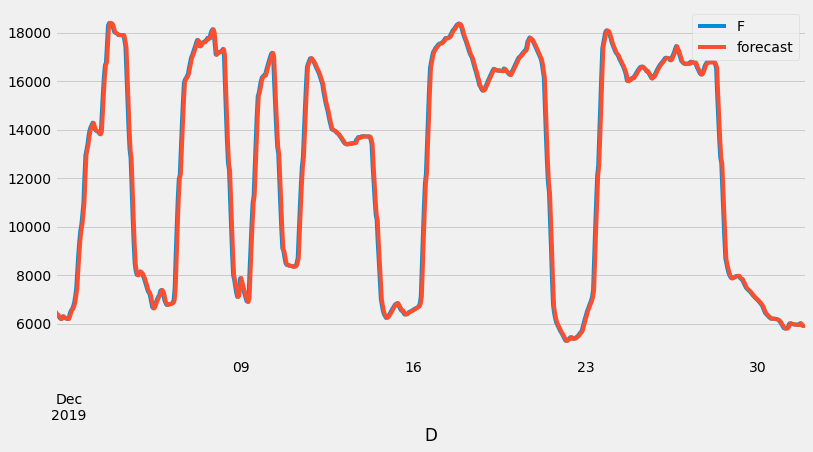

In [ ]:
fc.plot(figsize=(12,6))

# R2 and MAE (LSTM)

In [ ]:
from sklearn.metrics import r2_score
rlstm = r2_score(fc['F'],fc['forecast'])
rlstm

In [ ]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(fc['F'],fc['forecast'])

# **BI-LSTM**

In [ ]:
Training_Set = NewDataSetH.iloc[:8016,[6]]
TestData = NewDataSetH.iloc[8016:,[6]]
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range=(0, 1))
Train = sc.fit_transform(Training_Set)
def split_sequence(sequence, n_steps):
	X_Train, Y_Train = list(), list()
	for i in range(len(sequence)):
		# find the end of this pattern
		end_ix = i + n_steps
		# check if we are beyond the sequence
		if end_ix > len(sequence)-1:
			break
		# gather input and output parts of the pattern
		seq_x, seq_y = sequence[i:end_ix], sequence[end_ix]
		X_Train.append(seq_x)
		Y_Train.append(seq_y)
	return (X_Train,Y_Train)
 
raw_seq = Train
# choose a number of time steps
n_steps = 3
# split into samples
X_Train, Y_Train = split_sequence(raw_seq, n_steps)
# reshape from [samples, timesteps] into [samples, timesteps, features]
n_features = 1
X_Train = np.array(X_Train)
Y_Train = np.array(Y_Train)
X_Train = X_Train.reshape((X_Train.shape[0], X_Train.shape[1], n_features))
model = Sequential()
model.add(Bidirectional(LSTM(64,return_sequences=True, activation='relu'), input_shape=(n_steps, n_features)))
model.add(Bidirectional(LSTM(20, dropout=0.5)))
model.add(Dense(1))
model.compile(optimizer='rmsprop', loss='mse')
model.fit(X_Train, Y_Train, epochs=200, verbose=0)
Test = sc.fit_transform(TestData)
def split_sequence(sequence, n_steps):
	X_Test, Y_Test = list(), list()
	for i in range(len(sequence)):
		# find the end of this pattern
		end_ix = i + n_steps
		# check if we are beyond the sequence
		if end_ix > len(sequence)-1:
			break
		# gather input and output parts of the pattern
		seq_x, seq_y = sequence[i:end_ix], sequence[end_ix]
		X_Test.append(seq_x)
		Y_Test.append(seq_y)
	return (X_Test,Y_Test)
 
raw_seq = Test
# choose a number of time steps
n_steps = 3
# split into samples
X_Test, Y_Test = split_sequence(raw_seq, n_steps)
# reshape from [samples, timesteps] into [samples, timesteps, features]
n_features = 1
X_Test = np.array(X_Test)
Y_Test = np.array(Y_Test)
X_Test = X_Test.reshape((X_Test.shape[0], X_Test.shape[1], n_features))
yhat = model.predict(X_Test, verbose=0)
X_pred = sc.inverse_transform(yhat)
from sklearn.metrics import r2_score
print(r2_score(Y_Test, X_pred))
TRUE = TestData.iloc[3:,:].values
Predicted_MegaWatt  = X_pred
dates = TestData.index.to_list()
dates =dates[3:]
Machine_Df = pd.DataFrame(data={
    "True": [x[0] for x in TRUE ],
    "Predicted":[x[0] for x in Predicted_MegaWatt ],
		"Date":dates,
})
Machine_Df = Machine_Df.set_index('Date')
Machine_Df.plot(figsize=(12,6))
from sklearn.metrics import r2_score
r2_score(Machine_Df['True'],Machine_Df['Predicted'])
mean_squared_error(Machine_Df['True'],Machine_Df['Predicted'])

In [ ]:
r = ["LR","RF","SVR","DTR","XGB","ANN","LSTM"]
T = [0.94,0.96,0.12,0.92,0.95,0.92,0.79]
plt.bar(r, T, color ='maroon',
        width = 0.4)

# **Hourly**

In [ ]:
Df = pd.DataFrame(data={
    "LR":[0.94],
    "DT":[0.92],
    "SVR":[0.12],
    "RF":[0.96],
    "XGBOOST":[0.95],
    "ANN":[0.93],
    "LSTM":[0.79],
    "BI-LSTM":[0.82],
})
Df.plot(kind="bar",figsize=(15, 8))

## **LSTM**

In [ ]:
Training_Set = NewDataSetH.iloc[:8016,[6]]
TestData = NewDataSetH.iloc[8016:,[6]]
from sklearn.preprocessing import MinMaxScaler
Training_Set = Training_Set.values
sc = MinMaxScaler(feature_range=(0, 1))
Train = sc.fit_transform(Training_Set)
def split_sequence(sequence, n_steps):
	X_Train, Y_Train = list(), list()
	for i in range(len(Train)):
		
		end_ix = i + n_steps
		if end_ix > len(sequence)-1:
			break
		seq_x, seq_y = sequence[i:end_ix], sequence[end_ix]
		X_Train.append(seq_x)
		Y_Train.append(seq_y)
	return X_Train, Y_Train
 

raw_seq = Train

n_steps = 3

X_Train, Y_Train = split_sequence(raw_seq, n_steps)
X_Train = np.array(X_Train)
Y_Train = np.array(Y_Train)
X_Train = np.reshape(X_Train, newshape=(X_Train.shape[0], X_Train.shape[1], 1))
print(X_Train.shape)
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

regressor = Sequential()

# Adding the first LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50, return_sequences = True, input_shape = (X_Train.shape[1], 1,)))
regressor.add(Dropout(0.2))

# Adding a second LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

# Adding a third LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

# Adding a fourth LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50))
regressor.add(Dropout(0.2))

# Adding the output layer
regressor.add(Dense(units = 1))

# Compiling the RNN
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

regressor.fit(X_Train, Y_Train, epochs = 50, batch_size = 32, verbose=0)

Test = sc.fit_transform(TestData)
def xtest(sequence, n_steps):
	X_Test, Y_Test = list(), list()
	for i in range(len(Test)):
		
		end_ix = i + n_steps
		if end_ix > len(sequence)-1:
			break
		seq_x, seq_y = sequence[i:end_ix], sequence[end_ix]
		X_Test.append(seq_x)
		Y_Test.append(seq_y)
	return X_Test, Y_Test
 

raw_seq = Test

n_steps = 3

X_Test, Y_Test = xtest(raw_seq, n_steps)
X_Test = np.array(X_Test)
Y_Test = np.array(Y_Test)
X_Test = np.reshape(X_Test, newshape=(X_Test.shape[0], X_Test.shape[1], 1))
X_pred = regressor.predict(X_Test)
X_pred = sc.inverse_transform(X_pred)
Y_Test = sc.inverse_transform(Y_Test)
TRUE = TestData.iloc[3:,:].values
Predicted_MegaWatt  = X_pred
dates = TestData.index.to_list()
dates =dates[3:]
Machine_Df = pd.DataFrame(data={
    "True": [x[0] for x in TRUE ],
    "Predicted":[x[0] for x in Predicted_MegaWatt ],
		"Date":dates,
})
Machine_Df = Machine_Df.set_index('Date')
Machine_Df.plot(figsize=(12,6))
from sklearn.metrics import r2_score
r2_score(Machine_Df['True'],Machine_Df['Predicted'])
mean_squared_error(Machine_Df['True'],Machine_Df['Predicted'])

In [ ]:
from sklearn.metrics import r2_score
print(r2_score(Y_Test,X_pred))

# **BI-LSTM**

In [ ]:
Training_Set = dataset1.iloc[:480960,[0]]
TestData = dataset1.iloc[480960:,[0]]
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range=(0, 1))
Train = sc.fit_transform(Training_Set)
def split_sequence(sequence, n_steps):
	X_Train, Y_Train = list(), list()
	for i in range(len(sequence)):
		# find the end of this pattern
		end_ix = i + n_steps
		# check if we are beyond the sequence
		if end_ix > len(sequence)-1:
			break
		# gather input and output parts of the pattern
		seq_x, seq_y = sequence[i:end_ix], sequence[end_ix]
		X_Train.append(seq_x)
		Y_Train.append(seq_y)
	return (X_Train,Y_Train)
 
raw_seq = Train
# choose a number of time steps
n_steps = 3
# split into samples
X_Train, Y_Train = split_sequence(raw_seq, n_steps)
# reshape from [samples, timesteps] into [samples, timesteps, features]
n_features = 1
X_Train = np.array(X_Train)
Y_Train = np.array(Y_Train)
X_Train = X_Train.reshape((X_Train.shape[0], X_Train.shape[1], n_features))
model = Sequential()
model.add(Bidirectional(LSTM(64,return_sequences=True, activation='relu'), input_shape=(n_steps, n_features)))
model.add(Bidirectional(LSTM(20, dropout=0.5)))
model.add(Dense(1))
model.compile(optimizer='rmsprop', loss='mse')
model.fit(X_Train, Y_Train, epochs=200, verbose=0)
Test = sc.fit_transform(TestData)
def split_sequence(sequence, n_steps):
	X_Test, Y_Test = list(), list()
	for i in range(len(sequence)):
		# find the end of this pattern
		end_ix = i + n_steps
		# check if we are beyond the sequence
		if end_ix > len(sequence)-1:
			break
		# gather input and output parts of the pattern
		seq_x, seq_y = sequence[i:end_ix], sequence[end_ix]
		X_Test.append(seq_x)
		Y_Test.append(seq_y)
	return (X_Test,Y_Test)
 
raw_seq = Test
# choose a number of time steps
n_steps = 3
# split into samples
X_Test, Y_Test = split_sequence(raw_seq, n_steps)
# reshape from [samples, timesteps] into [samples, timesteps, features]
n_features = 1
X_Test = np.array(X_Test)
Y_Test = np.array(Y_Test)
X_Test = X_Test.reshape((X_Test.shape[0], X_Test.shape[1], n_features))
yhat = model.predict(X_Test, verbose=0)
X_pred = sc.inverse_transform(yhat)
from sklearn.metrics import r2_score
print(r2_score(Y_Test, X_pred))
TRUE = TestData.iloc[3:,:].values
Predicted_MegaWatt  = X_pred
dates = TestData.index.to_list()
dates =dates[3:]
Machine_Df = pd.DataFrame(data={
    "True": [x[0] for x in TRUE ],
    "Predicted":[x[0] for x in Predicted_MegaWatt ],
		"Date":dates,
})
Machine_Df = Machine_Df.set_index('Date')
Machine_Df.plot(figsize=(12,6))
from sklearn.metrics import r2_score
r2_score(Machine_Df['True'],Machine_Df['Predicted'])
mean_squared_error(Machine_Df['True'],Machine_Df['Predicted'])

In [ ]:
from sklearn.metrics import r2_score
print(r2_score(Y_Test,X_pred))
mean_squared_error(Y_Test,X_pred)

Hourly

# **LSTM**

In [ ]:
New = Df.resample('60T').sum()
Training_Set = New.iloc[:8016,[6]]
TestData = New.iloc[8016:,[6]]
from sklearn.preprocessing import MinMaxScaler
Training_Set = Training_Set.values
sc = MinMaxScaler(feature_range=(0, 1))
Train = sc.fit_transform(Training_Set)
def split_sequence(sequence, n_steps):
	X_Train, Y_Train = list(), list()
	for i in range(len(Train)):
		
		end_ix = i + n_steps
		if end_ix > len(sequence)-1:
			break
		seq_x, seq_y = sequence[i:end_ix], sequence[end_ix]
		X_Train.append(seq_x)
		Y_Train.append(seq_y)
	return X_Train, Y_Train
 

raw_seq = Train

n_steps = 3

X_Train, Y_Train = split_sequence(raw_seq, n_steps)
X_Train = np.array(X_Train)
Y_Train = np.array(Y_Train)
X_Train = np.reshape(X_Train, newshape=(X_Train.shape[0], X_Train.shape[1], 1))
print(X_Train.shape)
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

regressor = Sequential()

# Adding the first LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50, return_sequences = True, input_shape = (X_Train.shape[1], 1,)))
regressor.add(Dropout(0.2))

# Adding a second LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

# Adding a third LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

# Adding a fourth LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50))
regressor.add(Dropout(0.2))

# Adding the output layer
regressor.add(Dense(units = 1))

# Compiling the RNN
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

regressor.fit(X_Train, Y_Train, epochs = 50, batch_size = 32, verbose=0)

Test = sc.fit_transform(TestData)
def xtest(sequence, n_steps):
	X_Test, Y_Test = list(), list()
	for i in range(len(Test)):
		
		end_ix = i + n_steps
		if end_ix > len(sequence)-1:
			break
		seq_x, seq_y = sequence[i:end_ix], sequence[end_ix]
		X_Test.append(seq_x)
		Y_Test.append(seq_y)
	return X_Test, Y_Test
 

raw_seq = Test

n_steps = 3

X_Test, Y_Test = xtest(raw_seq, n_steps)
X_Test = np.array(X_Test)
Y_Test = np.array(Y_Test)
X_Test = np.reshape(X_Test, newshape=(X_Test.shape[0], X_Test.shape[1], 1))
X_pred = regressor.predict(X_Test)
X_pred = sc.inverse_transform(X_pred)
Y_Test = sc.inverse_transform(Y_Test)
TRUE = TestData.iloc[3:,:].values
Predicted_MegaWatt  = X_pred
dates = TestData.index.to_list()
dates =dates[3:]
Machine_Df = pd.DataFrame(data={
    "True": [x[0] for x in TRUE ],
    "Predicted":[x[0] for x in Predicted_MegaWatt ],
		"Date":dates,
})
Machine_Df = Machine_Df.set_index('Date')
Machine_Df.plot(figsize=(12,6))
mean_squared_error(Y_Test,X_pred)

In [ ]:
from sklearn.metrics import r2_score
print(r2_score(Machine_Df['True'],Machine_Df['Predicted']))
mean_squared_error(Machine_Df['True'],Machine_Df['Predicted'])

# **BI LSTM**

In [ ]:
print(New)

In [ ]:
Training_Set = dataset1.iloc[:8016,[6]]
TestData = dataset1.iloc[8016:,[6]]
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range=(0, 1))
Train = sc.fit_transform(Training_Set)
def split_sequence(sequence, n_steps):
	X_Train, Y_Train = list(), list()
	for i in range(len(sequence)):
		# find the end of this pattern
		end_ix = i + n_steps
		# check if we are beyond the sequence
		if end_ix > len(sequence)-1:
			break
		# gather input and output parts of the pattern
		seq_x, seq_y = sequence[i:end_ix], sequence[end_ix]
		X_Train.append(seq_x)
		Y_Train.append(seq_y)
	return (X_Train,Y_Train)
 
raw_seq = Train
# choose a number of time steps
n_steps = 3
# split into samples
X_Train, Y_Train = split_sequence(raw_seq, n_steps)
# reshape from [samples, timesteps] into [samples, timesteps, features]
n_features = 1
X_Train = np.array(X_Train)
Y_Train = np.array(Y_Train)
X_Train = X_Train.reshape((X_Train.shape[0], X_Train.shape[1], n_features))
model = Sequential()
model.add(Bidirectional(LSTM(64,return_sequences=True, activation='relu'), input_shape=(n_steps, n_features)))
model.add(Bidirectional(LSTM(20, dropout=0.5)))
model.add(Dense(1))
model.compile(optimizer='rmsprop', loss='mse')
model.fit(X_Train, Y_Train, epochs=200, verbose=0)
Test = sc.fit_transform(TestData)
def split_sequence(sequence, n_steps):
	X_Test, Y_Test = list(), list()
	for i in range(len(sequence)):
		# find the end of this pattern
		end_ix = i + n_steps
		# check if we are beyond the sequence
		if end_ix > len(sequence)-1:
			break
		# gather input and output parts of the pattern
		seq_x, seq_y = sequence[i:end_ix], sequence[end_ix]
		X_Test.append(seq_x)
		Y_Test.append(seq_y)
	return (X_Test,Y_Test)
 
raw_seq = Test
# choose a number of time steps
n_steps = 3
# split into samples
X_Test, Y_Test = split_sequence(raw_seq, n_steps)
# reshape from [samples, timesteps] into [samples, timesteps, features]
n_features = 1
X_Test = np.array(X_Test)
Y_Test = np.array(Y_Test)
X_Test = X_Test.reshape((X_Test.shape[0], X_Test.shape[1], n_features))
yhat = model.predict(X_Test, verbose=0)
X_pred = sc.inverse_transform(yhat)
from sklearn.metrics import r2_score
print(r2_score(Y_Test, X_pred))
TRUE = TestData.iloc[3:,:].values
Predicted_MegaWatt  = X_pred
dates = TestData.index.to_list()
dates =dates[3:]
Machine_Df = pd.DataFrame(data={
    "True": [x[0] for x in TRUE ],
    "Predicted":[x[0] for x in Predicted_MegaWatt ],
		"Date":dates,
})
Machine_Df = Machine_Df.set_index('Date')
Machine_Df.plot(figsize=(12,6))
from sklearn.metrics import r2_score
print(r2_score(Y_Test,X_pred))

In [ ]:
from sklearn.metrics import r2_score
r2_score(Machine_Df['True'],Machine_Df['Predicted'])
mean_squared_error(Machine_Df['True'],Machine_Df['Predicted'])

In [ ]:
r2_score(Machine_Df['True'],Machine_Df['Predicted'])

# **daily**

In [ ]:
New = Df.resample('D').sum()
Training_Set = New.iloc[:334,[6]]
TestData = New.iloc[334:,[6]]
from sklearn.preprocessing import MinMaxScaler
Training_Set = Training_Set.values
sc = MinMaxScaler(feature_range=(0, 1))
Train = sc.fit_transform(Training_Set)
def split_sequence(sequence, n_steps):
	X_Train, Y_Train = list(), list()
	for i in range(len(Train)):
		
		end_ix = i + n_steps
		if end_ix > len(sequence)-1:
			break
		seq_x, seq_y = sequence[i:end_ix], sequence[end_ix]
		X_Train.append(seq_x)
		Y_Train.append(seq_y)
	return X_Train, Y_Train
 

raw_seq = Train

n_steps = 3

X_Train, Y_Train = split_sequence(raw_seq, n_steps)
X_Train = np.array(X_Train)
Y_Train = np.array(Y_Train)
X_Train = np.reshape(X_Train, newshape=(X_Train.shape[0], X_Train.shape[1], 1))
print(X_Train.shape)
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

regressor = Sequential()

# Adding the first LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50, return_sequences = True, input_shape = (X_Train.shape[1], 1,)))
regressor.add(Dropout(0.2))

# Adding a second LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

# Adding a third LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

# Adding a fourth LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50))
regressor.add(Dropout(0.2))

# Adding the output layer
regressor.add(Dense(units = 1))

# Compiling the RNN
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

regressor.fit(X_Train, Y_Train, epochs = 50, batch_size = 32, verbose=0)

Test = sc.fit_transform(TestData)
def xtest(sequence, n_steps):
	X_Test, Y_Test = list(), list()
	for i in range(len(Test)):
		
		end_ix = i + n_steps
		if end_ix > len(sequence)-1:
			break
		seq_x, seq_y = sequence[i:end_ix], sequence[end_ix]
		X_Test.append(seq_x)
		Y_Test.append(seq_y)
	return X_Test, Y_Test
 

raw_seq = Test

n_steps = 3

X_Test, Y_Test = xtest(raw_seq, n_steps)
X_Test = np.array(X_Test)
Y_Test = np.array(Y_Test)
X_Test = np.reshape(X_Test, newshape=(X_Test.shape[0], X_Test.shape[1], 1))
X_pred = regressor.predict(X_Test)
X_pred = sc.inverse_transform(X_pred)
Y_Test = sc.inverse_transform(Y_Test)
TRUE = TestData.iloc[3:,:].values
Predicted_MegaWatt  = X_pred
dates = TestData.index.to_list()
dates =dates[3:]
Machine_Df = pd.DataFrame(data={
    "True": [x[0] for x in TRUE ],
    "Predicted":[x[0] for x in Predicted_MegaWatt ],
		"Date":dates,
})
Machine_Df = Machine_Df.set_index('Date')
Machine_Df.plot(figsize=(12,6))
mean_squared_error(Y_Test,X_pred)

In [ ]:
New = Df.resample('D').sum()
Training_Set = New.iloc[:334,[6]]
TestData = New.iloc[334:,[6]]
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range=(0, 1))
Train = sc.fit_transform(Training_Set)
def split_sequence(sequence, n_steps):
	X_Train, Y_Train = list(), list()
	for i in range(len(sequence)):
		# find the end of this pattern
		end_ix = i + n_steps
		# check if we are beyond the sequence
		if end_ix > len(sequence)-1:
			break
		# gather input and output parts of the pattern
		seq_x, seq_y = sequence[i:end_ix], sequence[end_ix]
		X_Train.append(seq_x)
		Y_Train.append(seq_y)
	return (X_Train,Y_Train)
 
raw_seq = Train
# choose a number of time steps
n_steps = 3
# split into samples
X_Train, Y_Train = split_sequence(raw_seq, n_steps)
# reshape from [samples, timesteps] into [samples, timesteps, features]
n_features = 1
X_Train = np.array(X_Train)
Y_Train = np.array(Y_Train)
X_Train = X_Train.reshape((X_Train.shape[0], X_Train.shape[1], n_features))
model = Sequential()
model.add(Bidirectional(LSTM(64,return_sequences=True, activation='relu'), input_shape=(n_steps, n_features)))
model.add(Bidirectional(LSTM(20, dropout=0.5)))
model.add(Dense(1))
model.compile(optimizer='rmsprop', loss='mse')
model.fit(X_Train, Y_Train, epochs=200, verbose=0)
Test = sc.fit_transform(TestData)
def split_sequence(sequence, n_steps):
	X_Test, Y_Test = list(), list()
	for i in range(len(sequence)):
		# find the end of this pattern
		end_ix = i + n_steps
		# check if we are beyond the sequence
		if end_ix > len(sequence)-1:
			break
		# gather input and output parts of the pattern
		seq_x, seq_y = sequence[i:end_ix], sequence[end_ix]
		X_Test.append(seq_x)
		Y_Test.append(seq_y)
	return (X_Test,Y_Test)
 
raw_seq = Test
# choose a number of time steps
n_steps = 3
# split into samples
X_Test, Y_Test = split_sequence(raw_seq, n_steps)
# reshape from [samples, timesteps] into [samples, timesteps, features]
n_features = 1
X_Test = np.array(X_Test)
Y_Test = np.array(Y_Test)
X_Test = X_Test.reshape((X_Test.shape[0], X_Test.shape[1], n_features))
yhat = model.predict(X_Test, verbose=0)
X_pred = sc.inverse_transform(yhat)
from sklearn.metrics import r2_score
print(r2_score(Y_Test, X_pred))
TRUE = TestData.iloc[3:,:].values
Predicted_MegaWatt  = X_pred
dates = TestData.index.to_list()
dates =dates[3:]
Machine_Df = pd.DataFrame(data={
    "True": [x[0] for x in TRUE ],
    "Predicted":[x[0] for x in Predicted_MegaWatt ],
		"Date":dates,
})
Machine_Df = Machine_Df.set_index('Date')
Machine_Df.plot(figsize=(12,6))

In [ ]:
from sklearn.metrics import r2_score
print(r2_score(X_pred,Y_Test))
mean_squared_error(Y_Test,X_pred)

In [ ]:
New = Df.resample('M').sum()
Training_Set = New.iloc[:6,[6]]
TestData = New.iloc[6:,[6]]
from sklearn.preprocessing import MinMaxScaler
Training_Set = Training_Set.values
sc = MinMaxScaler(feature_range=(0, 1))
Train = sc.fit_transform(Training_Set)
def split_sequence(sequence, n_steps):
	X_Train, Y_Train = list(), list()
	for i in range(len(Train)):
		
		end_ix = i + n_steps
		if end_ix > len(sequence)-1:
			break
		seq_x, seq_y = sequence[i:end_ix], sequence[end_ix]
		X_Train.append(seq_x)
		Y_Train.append(seq_y)
	return X_Train, Y_Train
 

raw_seq = Train

n_steps = 3

X_Train, Y_Train = split_sequence(raw_seq, n_steps)
X_Train = np.array(X_Train)
Y_Train = np.array(Y_Train)
X_Train = np.reshape(X_Train, newshape=(X_Train.shape[0], X_Train.shape[1], 1))
print(X_Train.shape)
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

regressor = Sequential()

# Adding the first LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50, return_sequences = True, input_shape = (X_Train.shape[1], 1,)))
regressor.add(Dropout(0.2))

# Adding a second LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

# Adding a third LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

# Adding a fourth LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50))
regressor.add(Dropout(0.2))

# Adding the output layer
regressor.add(Dense(units = 1))

# Compiling the RNN
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

regressor.fit(X_Train, Y_Train, epochs = 50, batch_size = 32, verbose=0)

Test = sc.fit_transform(TestData)
def xtest(sequence, n_steps):
	X_Test, Y_Test = list(), list()
	for i in range(len(Test)):
		
		end_ix = i + n_steps
		if end_ix > len(sequence)-1:
			break
		seq_x, seq_y = sequence[i:end_ix], sequence[end_ix]
		X_Test.append(seq_x)
		Y_Test.append(seq_y)
	return X_Test, Y_Test
 

raw_seq = Test

n_steps = 3

X_Test, Y_Test = xtest(raw_seq, n_steps)
X_Test = np.array(X_Test)
Y_Test = np.array(Y_Test)
X_Test = np.reshape(X_Test, newshape=(X_Test.shape[0], X_Test.shape[1], 1))
X_pred = regressor.predict(X_Test)
X_pred = sc.inverse_transform(X_pred)
Y_Test = sc.inverse_transform(Y_Test)
TRUE = TestData.iloc[3:,:].values
Predicted_MegaWatt  = X_pred
dates = TestData.index.to_list()
dates =dates[3:]
Machine_Df = pd.DataFrame(data={
    "True": [x[0] for x in TRUE ],
    "Predicted":[x[0] for x in Predicted_MegaWatt ],
		"Date":dates,
})
Machine_Df = Machine_Df.set_index('Date')
Machine_Df.plot(figsize=(12,6))
mean_squared_error(Y_Test,X_pred)